In [3]:
# Appeding the path to the scaman package
import sys
sys.path.append('/Users/berke/Codes/scaman/scaman')
# flann path
sys.path.append('/Users/berke/Codes/python/flann/src/python')

In [4]:
# Generate a random dataset
from serial.lle import LLE
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(100, 10)
labels = np.random.randint(0, 10, 100)

Text(0.5, 1.0, 'Random Dataset')

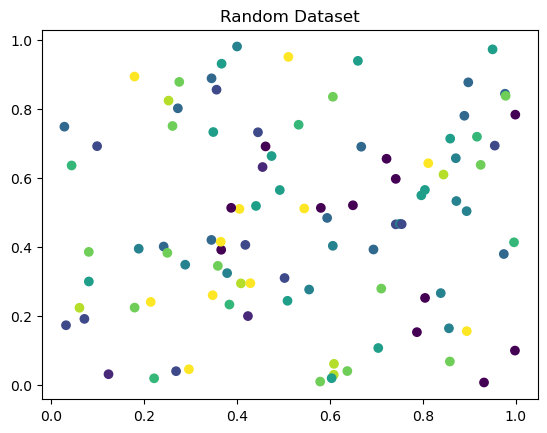

In [5]:
## plot the data with labels
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Random Dataset')

Weights Shape:
 (100, 100)


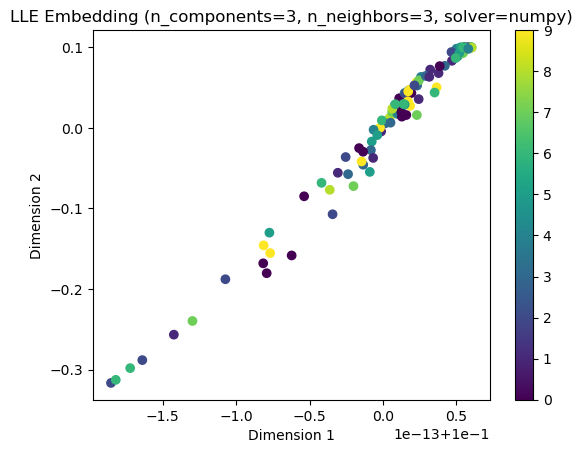

In [ ]:
# Create an instance of the LLE class with the numpy solver
lle_numpy = LLE(n_components=3, n_neighbors=3, solver="numpy")

# Fit and transform the data using the numpy solver
embedding_numpy = lle_numpy.fit_transform(data)

# Plot the embedding using the numpy solver
lle_numpy.plot(embedding_numpy,labels=labels)

In [ ]:
embedding_numpy.shape

(100, 3)

Weights Shape:
 (100, 100)


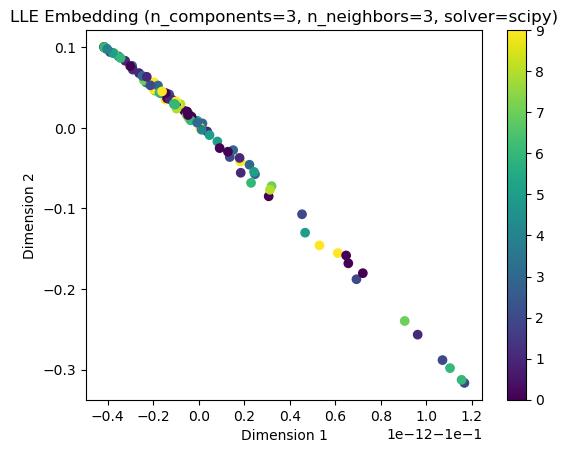

In [ ]:

# Create an instance of the LLE class with the scipy solver
lle_scipy = LLE(n_components=3, n_neighbors=3, solver="scipy")

# Fit and transform the data using the scipy solver
embedding_scipy = lle_scipy.fit_transform(data)

# Plot the embedding using the scipy solver
lle_scipy.plot(embedding_scipy,labels=labels)

In [ ]:
embedding_scipy.shape

(100, 3)

Weights Shape:
 (100, 100)
Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 46
Solution method: krylovschur
Number of requested eigenvalues: 3
Stopping condition: tol=0.001, maxit=100
Number of converged eigenpairs 9

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
    -0.000000           8.22056
     0.002309        8.7855e-13
     0.003756       6.51739e-13
     0.007282       7.44233e-13
     0.011388       6.34381e-12
     0.019739       3.18126e-09
     0.021435       5.35319e-09
     0.028744       5.58525e-06
     0.039236       0.000315636



/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


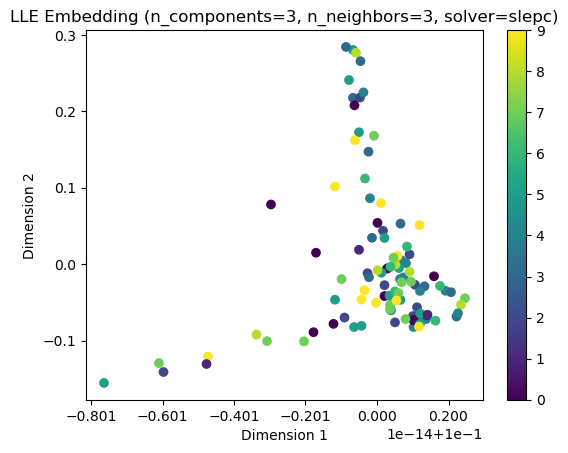

In [7]:
# Create an instance of the LLE class with the slepc solver KRYLOVSCUR
lle_slepc = LLE(n_components=3, n_neighbors=3, solver="slepc",slepc_solver='KRYLOVSCHUR',
                tol=1e-3,max_it=100)

# Fit and transform the data using the slepc solver
embedding_slepc = lle_slepc.fit_transform(data)

# Plot the embedding using the slepc solver
lle_slepc.plot(embedding_slepc,labels=labels)

Weights Shape:
 (100, 100)
Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 52
Solution method: krylovschur
Number of requested eigenvalues: 3
Stopping condition: tol=1e-06, maxit=1000
Number of converged eigenpairs 8

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
    -0.000000           8.14196
     0.002309       8.65967e-13
     0.003756       6.78809e-13
     0.007282       5.24509e-13
     0.011388        1.8966e-13
     0.019739        3.6081e-11
     0.021435       7.59247e-11
     0.028744       2.20807e-07



/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


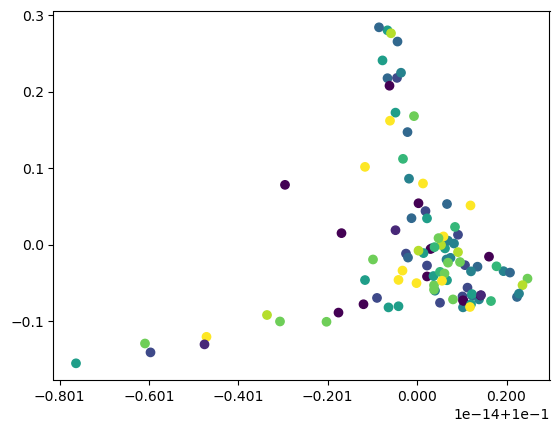

In [9]:
# Create an instance of the LLE class with the slepc solver ARNOLDI
lle_slepc = LLE(n_components=3, n_neighbors=3, solver="slepc",slepc_solver='KRYLOVSCHUR',
                tol=1e-6,max_it=1000)

# Fit and transform the data using the slepc solver
embedding_slepc = lle_slepc.fit_transform(data)

# Plot the embedding using the slepc solver
import matplotlib.pyplot as plt
plt.scatter(embedding_slepc[:, 0], embedding_slepc[:, 1], c=labels, cmap='viridis')

In [ ]:
embedding_slepc.shape

(100, 3)

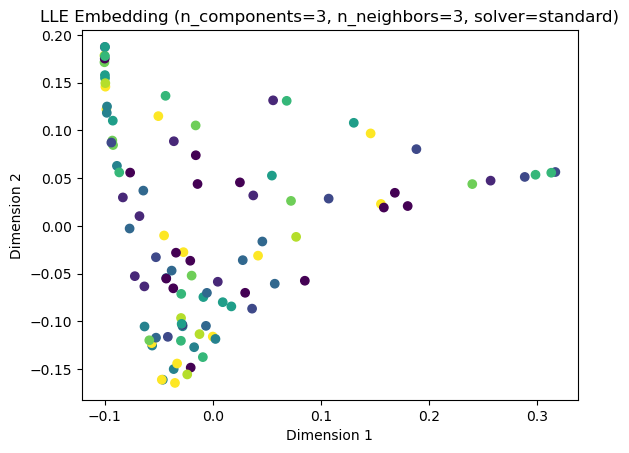

In [ ]:
##Using sklearn's LLE to compare
from sklearn.manifold import LocallyLinearEmbedding
lle_sklearn = LocallyLinearEmbedding(n_components=3, n_neighbors=3, method='standard')
embedding_sklearn = lle_sklearn.fit_transform(data)
plt.scatter(embedding_sklearn[:,0], embedding_sklearn[:,1],cmap='viridis',c=labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f'LLE Embedding (n_components={lle_sklearn.n_components}, n_neighbors={lle_sklearn.n_neighbors}, solver={lle_sklearn.method})')
plt.show()


In [ ]:
embedding_sklearn.shape

(100, 3)